## 1. Import the necessary packages

In [9]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import seaborn

## 2. Define and test the environment

In [11]:
envName = 'InvertedDoublePendulum-v2'
env = gym.make(envName)
env.reset(seed=0)
stateDim = env.observation_space.shape[0]
actionSpace = np.linspace(-1, 1, 20)
actionDim = actionSpace.shape[0]
print('The dimension of the state space is: ', stateDim)
print('The dimension of the action space is: ', actionDim)


The dimension of the state space is:  11
The dimension of the action space is:  20


In [12]:
random.choice(np.arange(1))

0

In [13]:
# # watch an untrained agent
# state = env.reset()
# for j in range(200):
#     a = np.random.choice(action_space)
#     action = np.array([a])
#     env.render()
#     state, reward, done, _ = env.step(action)
#     if done:
#         break

# env.close()

## 3. Train the Agent usint DQN algorithm

In [14]:
from dqn_agent import Agent

agent = Agent(state_size=stateDim, action_size=actionDim, action_space = actionSpace, seed=0)

In [15]:
def dqn(n_episodes=20000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    plot_score = []
    mark = []
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            actionRaw = agent.act(state, eps)
            action = np.array([actionRaw])
            next_state, reward, done, _ = env.step(action)
            agent.step(state, actionRaw, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            plot_score.append(np.mean(scores_window))
            mark.append(i_episode)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor.state_dict(), envName+'checkpoint.pth')
            break
        if i_episode == n_episodes:
            print('\nTraining done after {:d} episodes!\t Average Score of last 100 episodes: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor.state_dict(), envName + 'checkpoint_20.pth')
    return plot_score, mark
score, time = dqn()



Episode 100	Average Score: 29.14
Episode 200	Average Score: 29.51
Episode 300	Average Score: 29.19
Episode 400	Average Score: 28.91
Episode 500	Average Score: 29.25
Episode 600	Average Score: 29.24
Episode 700	Average Score: 28.93
Episode 800	Average Score: 28.74
Episode 900	Average Score: 28.32
Episode 1000	Average Score: 28.55
Episode 1100	Average Score: 28.41
Episode 1200	Average Score: 29.17
Episode 1300	Average Score: 31.83
Episode 1400	Average Score: 29.56
Episode 1500	Average Score: 31.83
Episode 1600	Average Score: 29.82
Episode 1700	Average Score: 32.67
Episode 1800	Average Score: 36.15
Episode 1900	Average Score: 50.21
Episode 2000	Average Score: 55.63
Episode 2100	Average Score: 79.28
Episode 2200	Average Score: 70.33
Episode 2300	Average Score: 75.41
Episode 2400	Average Score: 74.29
Episode 2500	Average Score: 82.87
Episode 2600	Average Score: 78.31
Episode 2700	Average Score: 82.71
Episode 2800	Average Score: 81.60
Episode 2900	Average Score: 84.57
Episode 3000	Average Sc

In [22]:
score

[29.143446217351574,
 29.50764243060506,
 29.194933406127834,
 28.90501159804738,
 29.24973124753903,
 29.236929430647418,
 28.92693655274112,
 28.738884485750813,
 28.323162799630353,
 28.548212479063118,
 28.414798399719512,
 29.167020362186722,
 31.83411529286418,
 29.564475177072467,
 31.834525951716564,
 29.824564513889428,
 32.66868089031203,
 36.153293650420025,
 50.206038689401296,
 55.62947510883278,
 79.28363853732739,
 70.33436781253462,
 75.41442370982794,
 74.2930469461134,
 82.8684389875844,
 78.30802020932234,
 82.70599452168062,
 81.60357211837058,
 84.57388759445877,
 86.70617550640968,
 83.88794833755225,
 89.04475709750092,
 88.52805976011867,
 88.09551057076187,
 91.83070879904803,
 88.76489194027486,
 88.73008678054231,
 91.59036306074637,
 94.4940249716041,
 90.44957276390977,
 88.31510270176477,
 90.72580369009196,
 91.67530306113245,
 94.19814248764531,
 92.27974824864263,
 94.2470530249975,
 95.95288300536087,
 91.90753605444114,
 96.20489070710144,
 92.9197154

In [24]:
score_new = [value * 3 for value in score]


/home/jerry/anaconda3/envs/mujoco_py/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


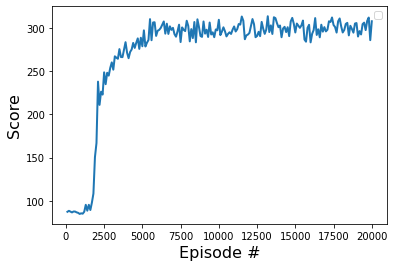

In [27]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(time, score_new, linewidth=2)
# plt.plot(score30[1], score30[0], linewidth=1.5)
# plt.plot(score20[1], score20[0], label = "20")
# plt.plot(score10[1], score10[0], label = "10")
plt.ylabel('Score', fontsize=16)
plt.xlabel('Episode #', fontsize=16)
plt.legend()
# plt.show()
plt.savefig('DDPG.png', dpi=300)

In [ ]:
random.choice(np.linspace(-1, 1, 10))

In [ ]:
random.choice(np.arange(10))